# Setup

In [6]:
# import packages
import pandas as pd
import plotly.graph_objects as go
import nfl_data_py as nfl  # load data

# Testing

In [62]:
df_2022 = nfl.import_pbp_data([2022])
df_players = nfl.import_rosters([2022])
df_teams = nfl.import_team_desc()

print(df_players.columns)

2022 done.
Downcasting floats.
Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'player_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'player_id', 'espn_id', 'sportradar_id',
       'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id', 'fantasy_data_id',
       'sleeper_id', 'years_exp', 'headshot_url', 'ngs_position', 'week',
       'game_type', 'status_description_abbr', 'football_name', 'esb_id',
       'gsis_it_id', 'smart_id', 'entry_year', 'rookie_year', 'draft_club',
       'draft_number'],
      dtype='object')


In [76]:
df_players

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,height,weight,college,player_id,espn_id,sportradar_id,yahoo_id,rotowire_id,pff_id,pfr_id,fantasy_data_id,sleeper_id,years_exp,headshot_url,ngs_position,week,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2022,ARI,DB,FS,31.0,R/Injured,Chris Banjo,Ayorunmi,Banjo,1990-02-26,70,207.0,Southern Methodist,00-0029747,15782,6c7704c2-f833-46aa-9f9c-d975d5ad1297,26621,9101,8419,None,15011,1442,9,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,R01,Chris,BAN373418,39941,32004241-4e37-3418-7494-6de47748ece8,2013,2013.0,None,NaN
1,2022,ARI,DB,FS,28.0,Active,Charles Washington,Charles,Washington,1993-03-10,70,192.0,Fresno State,00-0032560,2579163,7757384a-6b03-41fb-9c77-3c016a968d1c,29781,11341,11137,None,18521,3714,6,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,A01,Charles,WAS082938,43680,32005741-5308-2938-c497-7cfd2d22cbf6,2016,2016.0,None,NaN
2,2022,ARI,DB,CB,33.0,Active,Antonio Hamilton,Antonio,Hamilton,1993-01-24,72,190.0,South Carolina State,00-0032933,3056354,9bc107dc-1920-49db-b009-436d1a77955d,29957,11518,11353,None,18658,3838,6,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,A01,Antonio,HAM184824,43986,32004841-4d18-4824-5017-25555a65166e,2016,2016.0,None,NaN
3,2022,ARI,DB,SS,3.0,R/Injured,Budda Baker,Budda,Baker,1996-01-10,70,195.0,Washington,00-0033890,3127287,5ce20f3e-0f02-4f53-a2ef-5b076361f2b1,30149,11986,11791,BakeBu00,18927,4081,5,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,R01,Budda,BAK070449,44848,32004241-4b07-0449-419d-4d7a3da71f8e,2017,2017.0,ARI,36.0
4,2022,ARI,DB,CB,27.0,Prac Sq.; Inj,Nate Hairston,Nathan,Hairston,1994-06-30,72,185.0,Temple,00-0033568,2976259,aaa9228d-7399-4b53-a2e7-259438bd2959,30271,12016,11913,HairNa00,19048,4202,5,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,P02,Nate,HAI741950,44971,32004841-4974-1950-1414-941e1bb47e67,2017,2017.0,IND,158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,2022,WAS,WR,WR,18.0,R/Retired,Antonio Gandy-Golden,Antonio,Gandy-Golden,NaT,None,220.0,Liberty,00-0036340,4029893,7bb0744a-c93f-401b-9091-2a34072a40c2,32812,14568,39993,GandAn00,21742,6906,2,https://static.www.nfl.com/image/private/f_aut...,None,18,REG,R02,Antonio,GAN139028,52550,32004741-4e13-9028-ffdd-34109916cfd5,2020,2020.0,WAS,142.0
2637,2022,WAS,WR,WR,2.0,Active,Dyami Brown,Dyami,Brown,1999-11-01,72,185.0,None,00-0036626,4361577,0fb60ada-bdd3-4d74-8c98-058303a1649a,33470,15274,77986,BrowDy00,None,7587,1,https://static.www.nfl.com/image/private/f_aut...,WR,18,REG,A01,Dyami,BRO408220,53511,32004252-4f40-8220-1974-8f5000372de2,2021,2021.0,WAS,82.0
2638,2022,WAS,WR,WR,15.0,Active,Dax Milne,Dax,Milne,1999-06-23,73,190.0,None,00-0036671,4373642,cab3a948-e9a2-4b3d-b893-020836be00d2,33645,15569,84147,MilnDa00,None,7751,1,https://static.www.nfl.com/image/private/f_aut...,SLOT_WR,18,REG,A01,Dax,MIL755745,53687,32004d49-4c75-5745-8754-e10630234ec7,2021,2021.0,WAS,258.0
2639,2022,WAS,WR,WR,1.0,Active,Jahan Dotson,Jahan,Dotson,2000-03-22,71,182.0,None,00-0037741,4361409,d4a7917d-f327-431b-9b87-83af341c3e21,None,15850,None,None,None,8119,0,https://static.www.nfl.com/image/private/f_aut...,WR,18,REG,A01,Jahan,DOT282798,54481,3200444f-5428-2798-d9f2-9e8608edcb8a,2022,2022.0,WAS,16.0


In [64]:
# Filter to only the data needed for fantasy football
df_2022 = df_2022[df_2022["season_type"] == "REG"]
df_2022 = df_2022[df_2022["week"] <= 17]


In [66]:
# Add team info
df_2022 = df_2022.merge(df_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [68]:
stats = ["passing_yards", "pass_touchdown", "interception", "fumble_lost", "rushing_yards", "rush_touchdown", "receiving_yards", "touchdown"]
stat_dict = dict()
for s in stats:
    stat_dict[s] = "sum"
    
df_agg = (
    df_2022.groupby(["name", "team_abbr", "team_color", "week"], as_index=False)
    .agg(stat_dict)
)

In [69]:
df_agg[df_agg["name"] == "J.Allen"]

,name,team_abbr,team_color,week,passing_yards,pass_touchdown,interception,fumble_lost,rushing_yards,rush_touchdown,receiving_yards,touchdown
886,J.Allen,BUF,#00338D,1,297.0,3.0,2.0,0.0,56.0,1.0,297.0,4.0
887,J.Allen,BUF,#00338D,2,317.0,4.0,0.0,0.0,10.0,0.0,317.0,4.0
888,J.Allen,BUF,#00338D,3,400.0,2.0,0.0,1.0,47.0,0.0,400.0,2.0
889,J.Allen,BUF,#00338D,4,213.0,1.0,1.0,0.0,70.0,1.0,213.0,2.0
890,J.Allen,BUF,#00338D,5,424.0,4.0,1.0,1.0,42.0,0.0,424.0,4.0
891,J.Allen,BUF,#00338D,6,329.0,3.0,0.0,1.0,32.0,0.0,329.0,3.0
892,J.Allen,BUF,#00338D,8,218.0,2.0,2.0,0.0,49.0,0.0,218.0,2.0
893,J.Allen,BUF,#00338D,9,205.0,0.0,2.0,0.0,86.0,2.0,205.0,2.0
894,J.Allen,BUF,#00338D,10,330.0,1.0,2.0,1.0,84.0,0.0,330.0,2.0
895,J.Allen,BUF,#00338D,11,197.0,1.0,0.0,0.0,7.0,0.0,197.0,1.0


# Weekly Data

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
# Get normal distribution parameters for a player
def player_dist(weekly_df, player_name):
    # Get each week's data
    player_weeks_df = weekly_df[weekly_df['player_display_name'] == player_name]
    
    # Number of games played by the player.
    n_games = len(player_weeks_df.index)
    
    # Convert to numpy
    player_weeks_np = player_weeks_df[['fantasy_points_ppr']].to_numpy()
        
    # Average and variance
    avg = np.average(player_weeks_np)
    s2 = np.var(player_weeks_np)
    
    return avg, s2, n_games

def sample_ppr_repl_team(position_replacements, lineup, N):
    n_lineup_spots = len(lineup)
    
    # Sample scores
    ppr_team_scores = None
    for i in range(n_lineup_spots):
        # Get the position from the lineup
        pos = lineup[i]

        # Get position distribution parameters
        mean = position_replacements[pos]['avg']
        std = np.sqrt(position_replacements[pos]['s2'])

        # Sample the position
        pos_samples = np.random.default_rng().normal(mean, std, N)

        # Add to the scores
        if ppr_team_scores is None:
            ppr_team_scores = pos_samples
        else:
            ppr_team_scores += pos_samples
    
    return ppr_team_scores

def sample_player(weekly_df, player_name, N):
    # Get player distribution
    mu, s2, n_games = player_dist(weekly_df, player_name)
        
    # Convert s2 to std. dev
    player_samples = np.random.default_rng().normal(mu, std, N)
    
    # Ensure player scores are >= 0
    player_samples[player_samples < 0] = 0.0
    
    return player_samples

In [91]:
def plot_samples(scores, mu, sigma):
    count, bins, ignored = plt.hist(scores, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')

    plt.show()

In [8]:
weekly_data = nfl.import_weekly_data([2022])

Downcasting floats.


In [9]:
weekly_data.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,10.38,10.38
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,9.40,9.40
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,14.74,14.74
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,25.40,25.40
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,19.74,19.74


In [10]:
weekly_data['position'].unique()

array(['QB', 'P', 'TE', 'WR', 'RB', 'ILB', 'FB', 'T', 'FS', 'SS', 'OLB',
       'CB'], dtype=object)

In [11]:
# only show data from week 17 and earlier (fantasy regular season and playoffs)
weekly_data = weekly_data[weekly_data['week'] <= 17]

In [12]:
# Get total fantasy points for each player via aggregation
week_agg = (
    weekly_data.groupby(["player_display_name", "position"], as_index=False)
    .agg({"fantasy_points_ppr": "sum"})
)

In [13]:
week_agg

,player_display_name,position,fantasy_points_ppr
0,A.J. Brown,WR,286.100006
1,A.J. Dillon,RB,164.300003
2,A.J. Green,WR,43.500000
3,Aaron Jones,RB,240.800003
4,Aaron Rodgers,QB,228.000000
...,...,...,...
597,Zack Moss,RB,43.400002
598,Zamir White,RB,6.600000
599,Zander Horvath,RB,18.600000
600,Zay Jones,WR,192.000000


In [14]:
positions = ["QB", "RB", "WR", "TE"] # Still need a way to get K and D/ST data.
position_dfs = {}

# Separate results by position
for p in positions:
    position_dfs[p] = week_agg[week_agg['position'] == p]
    position_dfs[p] = position_dfs[p].sort_values('fantasy_points_ppr', ascending=False)

In [53]:
# Example
position_dfs['TE'].head(25)

,player_display_name,position,fantasy_points_ppr
552,Travis Kelce,TE,306.500000
528,T.J. Hockenson,TE,212.800003
392,Mark Andrews,TE,190.500000
208,George Kittle,TE,181.599991
197,Evan Engram,TE,170.199997
457,Pat Freiermuth,TE,148.199997
577,Tyler Higbee,TE,144.699997
534,Taysom Hill,TE,142.300003
127,Dalton Schultz,TE,135.399994
326,Juwan Johnson,TE,131.699997


In [71]:
# compute replacement level player for each position group
# Lineup format: QB, 2x RB, 2x WR, 1x TE, 1x FLEX, D/ST, K
#
# We will define replacement level as the average player for a 
# given position who would not be on a starting lineup on a team
# For example, the 13th best QB would not make the starting lineup
# in a 12 team league.
# 
#
# Replacement level QB: average pts. for ranks #13-24
# Replacement level RB: average pts. for ranks #25-48
# Replacement level WR: average pts. for ranks #25-48
# Replacement level TE: average pts. for ranks #13-24
# Replacement level FLEX: since FLEX is RB/WR/TE, use the position WAR.
#
# Zero-index and upper bound is not inclusive
pos_ranges = {
    'QB': [12, 24],
    'RB': [24, 48],
    'WR': [24, 48],
    'TE': [12, 24]
}

position_replacements = {}

for p in positions:
    pos_range = position_dfs[p].iloc[pos_ranges[p][0]:pos_ranges[p][1]]
    
    pos_avg = []
    pos_s2 = []
    for i, row in pos_range.iterrows():
        name = row['player_display_name']
        avg, s2, _ = player_dist(weekly_data, name)
#         print(f"{name} - Avg: {avg}, s2: {s2}")
        pos_avg.append(avg)
        pos_s2.append(s2)
        
    position_replacements[p] = {}
    position_replacements[p]['avg'] = np.average(pos_avg)
    position_replacements[p]['s2'] = np.average(pos_s2)

In [72]:
# Compute FLEX as a weighted average of RB, WR and TE
flex_options = ['RB', 'WR', 'TE']
flex_weights = [0.4, 0.5, 0.1]

flex_avg = 0
flex_s2 = 0
for i in range(len(flex_options)):
    avg = position_replacements[flex_options[i]]['avg']
    s2 = position_replacements[flex_options[i]]['s2']
    
    flex_avg += avg * flex_weights[i]
    flex_s2 += s2 * flex_weights[i]
    
position_replacements['FLEX'] = {
    'avg': flex_avg,
    's2': flex_s2
}

In [73]:
# Manual augmentation of K and D/ST
position_replacements['K'] = {
    'avg': 6,
    's2': 16
}
position_replacements['DST'] = {
    'avg': 5,
    's2': 25
}

In [74]:
position_replacements

{'QB': {'avg': 15.393757, 's2': 47.682476},
 'RB': {'avg': 9.839898, 's2': 45.30572},
 'WR': {'avg': 11.436713, 's2': 44.914127},
 'TE': {'avg': 7.9480615, 's2': 26.334734},
 'FLEX': {'avg': 10.449121999740601, 's2': 43.21282558441162},
 'K': {'avg': 6, 's2': 16},
 'DST': {'avg': 5, 's2': 25}}

In [85]:
# Compute a PPR team as a normal distribution using sampling
N = 1000

# Lineup for the team
lineup = ['QB', 'RB', 'RB', 'WR', 'WR', 'TE', 'FLEX', 'DST', 'K']

# Sample the team
ppr_repl_team_scores = sample_ppr_repl_team(position_replacements, lineup, N)

In [86]:
repl_avg = np.average(ppr_repl_team_scores)
repl_sigma = np.std(ppr_repl_team_scores)
print(f"Replacement level team - AVG: {repl_avg} - SIGMA: {repl_sigma}")

Replacement level team - AVG: 87.16751641556593 - SIGMA: 18.72899744245868


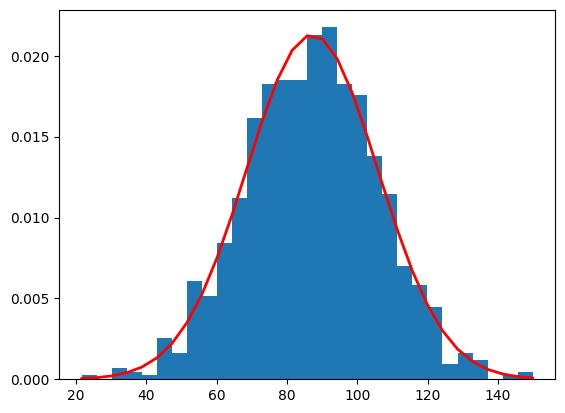

In [92]:
plot_samples(ppr_repl_team_scores, repl_avg, repl_sigma)

# Player Lookup (Testing)

In [143]:
pos = 'RB'
mu, sigma, n_games = player_dist(weekly_data, 'Austin Ekeler')

In [144]:
mod_lineup = ['QB', 'RB', 'WR', 'WR', 'TE', 'FLEX', 'DST', 'K']

mod_team_scores = sample_ppr_repl_team(position_replacements, mod_lineup, N)
player_samples = sample_player(weekly_data, 'Austin Ekeler', N)
player_team_scores = mod_team_scores + player_samples

In [145]:
player_team_avg = np.average(player_team_scores)
player_team_sigma = np.std(player_team_scores)
print(f"Replacement level team - AVG: {player_team_avg} - SIGMA: {player_team_sigma}")

Replacement level team - AVG: 100.1004208017719 - SIGMA: 17.404981623608624


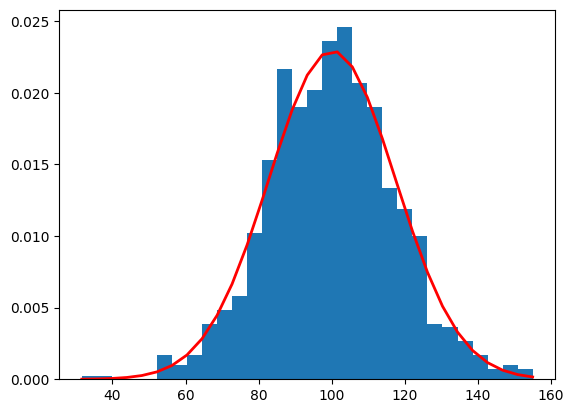

In [146]:
plot_samples(player_team_scores, player_team_avg, player_team_sigma)

In [147]:
from scipy.stats import norm

player_wpa = norm.cdf(player_team_avg, loc=repl_avg, scale=repl_sigma) - 0.5
player_war = n_games * player_wpa
player_war

4.081104280049956

# WAR Ranks

In [153]:
player_list_df = week_agg
PPR_LINEUP = ['QB', 'RB', 'RB', 'WR', 'WR', 'TE', 'FLEX', 'DST', 'K']
N = 10000
MIN_GAMES = 3

In [154]:
war_data = {'player_display_name':[], 'position': [], 'n_games':[], 'mu': [], 'sigma': [], 'wpa': [], 'war': []}

for i, row in player_list_df.iterrows():
    # Copy the lineup explicitly since we will modify it.
    mod_lineup = list.copy(PPR_LINEUP)
    
    # Get player info
    name = row['player_display_name']
    pos = row['position']
    p_mu, p_sigma, p_games = player_dist(weekly_data, name)
    
    # Remove position from lineup if it exists, or if the player did not play at least 3 games
    if pos not in PPR_LINEUP or p_games < MIN_GAMES:
        continue
    mod_lineup.remove(pos)
    
    # Sample a replacement team's score with this player added
    mod_team_scores = sample_ppr_repl_team(position_replacements, mod_lineup, N)
    player_samples = sample_player(weekly_data, name, N)
    player_team_scores = mod_team_scores + player_samples
    
    # Get this fictitious team's normal distribution parameters
    player_team_avg = np.average(player_team_scores)
    player_team_sigma = np.std(player_team_scores)
    
    # Compute WPA and WAR
    player_wpa = norm.cdf(player_team_avg, loc=repl_avg, scale=repl_sigma) - 0.5
    player_war = p_games * player_wpa

    # Update the dictionary
    war_data['player_display_name'].append(name)
    war_data['position'].append(pos)
    war_data['n_games'].append(p_games)
    war_data['mu'].append(p_mu)
    war_data['sigma'].append(np.sqrt(p_sigma))
    war_data['wpa'].append(player_wpa)
    war_data['war'].append(player_war)


In [155]:
war_df = pd.DataFrame(war_data)

In [156]:
war_df = war_df.sort_values(by=['war'], ascending=False, ignore_index=True)
pd.set_option('display.max_rows', 500)
war_df.head(100)

,player_display_name,position,n_games,mu,sigma,wpa,war
0,Austin Ekeler,RB,16,22.731251,8.369044,0.253324,4.053190
1,Justin Jefferson,WR,16,22.553749,11.495086,0.234175,3.746800
2,Christian McCaffrey,RB,16,21.216249,8.457760,0.231361,3.701781
3,Travis Kelce,TE,16,19.156250,7.589958,0.231081,3.697292
4,Josh Jacobs,RB,16,20.081249,11.605990,0.210124,3.361983
5,Tyreek Hill,WR,16,21.056250,8.943710,0.199604,3.193663
6,Patrick Mahomes,QB,16,25.151249,5.977345,0.199440,3.191037
7,Jalen Hurts,QB,14,26.398573,5.855700,0.224177,3.138480
8,Davante Adams,WR,16,20.200001,11.897794,0.186813,2.989009
9,Josh Allen,QB,15,24.917336,6.546836,0.194229,2.913431


# Position Rank Lookup

In [157]:
pos = 'RB'
pos_war_df = war_df[war_df['position'] == pos]
pos_war_df = pos_war_df.reset_index(drop = True)
pos_war_df.head(100)

,player_display_name,position,n_games,mu,sigma,wpa,war
0,Austin Ekeler,RB,16,22.731251,8.369044,0.253324,4.053190
1,Christian McCaffrey,RB,16,21.216249,8.457760,0.231361,3.701781
2,Josh Jacobs,RB,16,20.081249,11.605990,0.210124,3.361983
3,Derrick Henry,RB,15,19.264000,8.395094,0.193837,2.907556
4,Saquon Barkley,RB,16,17.750000,7.281913,0.168758,2.700134
5,Nick Chubb,RB,16,16.137501,7.023965,0.138335,2.213358
6,Tony Pollard,RB,15,16.460001,9.784056,0.141234,2.118512
7,Joe Mixon,RB,13,17.053846,11.694878,0.152377,1.980900
8,Rhamondre Stevenson,RB,16,14.743750,7.597365,0.113561,1.816971
9,Aaron Jones,RB,16,15.050000,7.900554,0.113169,1.810706
